In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_file = "../merged_data/merged_all_data.csv"
base_df = pd.read_csv(base_file)
trans_df = base_df.transpose()
trans_df.columns = trans_df.iloc[1]
trans_df = trans_df.drop(trans_df.index[1])
trans_df = trans_df.drop(trans_df.index[0])

trans_df = trans_df.drop(["Employment_2001","Establishments_2001","Employment_2002","Establishments_2002",
                         "Employment_2003","Establishments_2003","Employment_2004","Establishments_2004",
                         "Employment_2005","Establishments_2005","Employment_2006","Establishments_2006",
                         "Employment_2008","Establishments_2008","Employment_2009","Establishments_2009",
                         "Employment_2010","Establishments_2010","Employment_2011","Establishments_2011",
                         "Employment_2012","Establishments_2012","Employment_2013","Establishments_2013",
                         "Employment_2014","Establishments_2014"])
trans_df

Description,Furniture and Home Furnishings Stores,Electronics and Appliance Stores,Grocery Stores,Clothing and Clothing Accessories Stores
Employment_2000,"549,184","407,321","2,716,868","1,368,665"
Establishments_2000,"64,842","45,592","98,275","150,946"
Employment_2007,"596,538","500,780","2,564,533","1,648,157"
Establishments_2007,"65,485","52,470","92,315","155,371"
Employment_2015,"445,240","407,409","2,800,048","1,711,022"
Establishments_2015,"50,336","46,731","95,514","146,694"


In [3]:
trans_df=trans_df.rename(columns= {'Furniture and Home Furnishings Stores': 'furniture',
                                     'Electronics and Appliance Stores':'electronics',
                                     'Grocery Stores':'grocery','Clothing and Clothing Accessories Stores':'clothing'}) 

trans_df

Description,furniture,electronics,grocery,clothing
Employment_2000,"549,184","407,321","2,716,868","1,368,665"
Establishments_2000,"64,842","45,592","98,275","150,946"
Employment_2007,"596,538","500,780","2,564,533","1,648,157"
Establishments_2007,"65,485","52,470","92,315","155,371"
Employment_2015,"445,240","407,409","2,800,048","1,711,022"
Establishments_2015,"50,336","46,731","95,514","146,694"


In [13]:
reverse_df = trans_df.transpose()
reverse_df

,Employment_2000,Establishments_2000,Employment_2007,Establishments_2007,Employment_2015,Establishments_2015
Description,,,,,,
furniture,"549,184","64,842","596,538","65,485","445,240","50,336"
electronics,"407,321","45,592","500,780","52,470","407,409","46,731"
grocery,"2,716,868","98,275","2,564,533","92,315","2,800,048","95,514"
clothing,"1,368,665","150,946","1,648,157","155,371","1,711,022","146,694"


In [14]:
# df.pivot(index='channel', columns='ab', values='booked').plot(kind='bar')

df1 = reverse_df.iloc[0]
df2 = reverse_df.iloc[1]
df3 = reverse_df.iloc[2]
df4 = reverse_df.iloc[3]
df1

Employment_2000        549,184
Establishments_2000     64,842
Employment_2007        596,538
Establishments_2007     65,485
Employment_2015        445,240
Establishments_2015     50,336
Name: furniture, dtype: object

<BarContainer object of 6 artists>

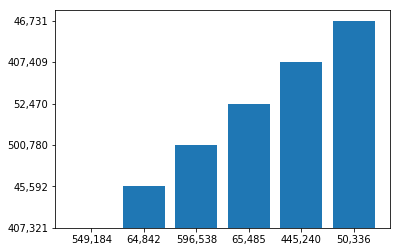

In [18]:
plt.bar(df1,df2)

In [15]:
fig = plt.figure()

for frame in [df1, df2, df3]:
    plt.plot(frame['furniture'], frame['electronics'])
#     plt.plot(kind='bar')

# plt.xlim(0,18000)
# plt.ylim(0,30)
plt.show()

KeyError: 'furniture'

<Figure size 432x288 with 0 Axes>

In [8]:
df1= df1.reset_index()
df1

Description,index,furniture,electronics,grocery,clothing
0,Employment_2000,"549,184","407,321","2,716,868","1,368,665"
1,Establishments_2000,"64,842","45,592","98,275","150,946"


In [9]:
df1=df1.rename(columns= {"index":"years"})

In [10]:
df1.reset_index(drop=True, inplace=True)


In [11]:
df1

Description,years,furniture,electronics,grocery,clothing
0,Employment_2000,"549,184","407,321","2,716,868","1,368,665"
1,Establishments_2000,"64,842","45,592","98,275","150,946"


In [12]:
df1.pivot(index='years', columns=None, values=['furniture', 'electronics','grocery','clothing']).plot(kind='bar')

ValueError: cannot label index with a null key

In [ ]:
ax = df1[['furniture', 'electronics', 'grocery', 'clothing']].plot(kind='bar',figsize=(15,10), fontsize=12)
# ax = df1.plot(kind='bar')
# ax= df2.plot(kind="bar")